In [ ]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

In [ ]:
df=pd.read_csv('bbc_text_cls.csv')

In [ ]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
df['labels'].astype('category').cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

In [ ]:
df['target']=df['labels'].astype('category').cat.codes
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Name: target, Length: 2225, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3)

In [ ]:
df_train.head()

,text,labels,target
1856,"Global digital divide 'narrowing'\n\nThe ""digi...",tech,4
641,Hard act to follow for OutKast\n\nUS rap duo O...,entertainment,1
680,US 'to raise TV indecency fines'\n\nUS politic...,entertainment,1
712,Greer attacks 'bully' Big Brother\n\nGermaine ...,entertainment,1
2015,Mobile gaming takes off in India\n\nGaming on ...,tech,4


In [ ]:
df_test.head()

,text,labels,target
1592,Mourinho takes swipe at Arsenal\n\nChelsea bos...,sport,3
308,AstraZeneca hit by drug failure\n\nShares in A...,business,0
1247,Blair joins school sailing trip\n\nThe prime m...,politics,2
1810,Dent continues Adelaide progress\n\nAmerican T...,sport,3
1220,UKIP could sue Veritas defectors\n\nThe UK Ind...,politics,2


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english')
x_train=vectorizer.fit_transform(df_train['text'])
x_test=vectorizer.transform(df_test['text'])
y_train=df_train['target']
y_test=df_test['target']

In [ ]:
print(x_train)

  (0, 59)	0.025916323564664504
  (0, 589)	0.0339038137798029
  (0, 7083)	0.0860365300496284
  (0, 2687)	0.035752539062742804
  (0, 5331)	0.05777773602337794
  (0, 19233)	0.0491000265841402
  (0, 17003)	0.057037736664680684
  (0, 6574)	0.03246551991620839
  (0, 5399)	0.03463300055295745
  (0, 12520)	0.06954710328671276
  (0, 14726)	0.06395910361334323
  (0, 8666)	0.058576996219351814
  (0, 21235)	0.06954710328671276
  (0, 18096)	0.05509900697072145
  (0, 20471)	0.03153597277886649
  (0, 17866)	0.04014563819485006
  (0, 16089)	0.06549836316801436
  (0, 5871)	0.052080604971157546
  (0, 5886)	0.049765968087131095
  (0, 18031)	0.04068552220332832
  (0, 17979)	0.19770978717955992
  (0, 3008)	0.02908832164937062
  (0, 5465)	0.04355814903329246
  (0, 13940)	0.035923234189806
  (0, 9283)	0.042844601138468545
  :	:
  (1556, 11410)	0.06262727477827257
  (1556, 24897)	0.05495839926317296
  (1556, 22177)	0.05006057906833304
  (1556, 13212)	0.03920732221139126
  (1556, 9274)	0.04002828525999616
  (1

In [ ]:
print(x_test)

  (0, 25184)	0.06440964571170323
  (0, 24866)	0.05556682873902398
  (0, 24678)	0.06829079924754819
  (0, 23814)	0.11600754963233759
  (0, 23735)	0.08626379742911897
  (0, 23256)	0.14342209362205927
  (0, 23053)	0.07427721137873639
  (0, 23038)	0.12402578973651644
  (0, 23001)	0.11805065970879099
  (0, 22786)	0.10911964078719386
  (0, 22708)	0.08003293949901884
  (0, 22643)	0.0960027234777761
  (0, 22499)	0.07976749372379896
  (0, 22397)	0.15144033372623816
  (0, 21342)	0.09219848978738629
  (0, 21119)	0.12666642821834403
  (0, 20930)	0.10692010787987485
  (0, 20720)	0.07292617009061336
  (0, 20111)	0.11295915622348318
  (0, 19896)	0.023068594595429533
  (0, 19545)	0.09123364412444346
  (0, 19256)	0.08385337590504764
  (0, 18720)	0.09925188422862233
  (0, 17957)	0.06785294933171034
  (0, 17783)	0.07638296621662911
  :	:
  (667, 4802)	0.16589154126885325
  (667, 4626)	0.0816156045850258
  (667, 4495)	0.09509327987117897
  (667, 3971)	0.06541405725449531
  (667, 3781)	0.3613890934049186
 

In [ ]:
print(y_train)

1856    4
641     1
680     1
712     1
2015    4
       ..
2151    4
472     0
573     1
1352    3
1353    3
Name: target, Length: 1557, dtype: int8


In [ ]:
print(y_test)

1592    3
308     0
1247    2
1810    3
1220    2
       ..
1476    3
1544    3
1281    2
646     1
684     1
Name: target, Length: 668, dtype: int8


In [ ]:
k=df['target'].max()+1  #no of classes
k
d=x_train.shape[1]   #no of dimmensions
d

25315

In [ ]:
i=Input(shape=(d,))
x=Dense(300,activation='relu')(i)
x=Dense(k)(x)
model=Model(i,x)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 25315)]           0         
                                                                 
 dense_6 (Dense)             (None, 300)               7594800   
                                                                 
 dense_7 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,596,305
Trainable params: 7,596,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [ ]:
x_train=x_train.toarray()
x_test=x_test.toarray()

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=7,batch_size=128)

Epoch 1/7
13/13 [==============================] - 4s 246ms/step - loss: 1.4531 - accuracy: 0.8420 - val_loss: 1.1816 - val_accuracy: 0.9611
Epoch 2/7
13/13 [==============================] - 4s 282ms/step - loss: 0.8787 - accuracy: 0.9923 - val_loss: 0.7181 - val_accuracy: 0.9671
Epoch 3/7
13/13 [==============================] - 2s 171ms/step - loss: 0.4162 - accuracy: 0.9961 - val_loss: 0.4156 - val_accuracy: 0.9731
Epoch 4/7
13/13 [==============================] - 3s 197ms/step - loss: 0.1811 - accuracy: 0.9994 - val_loss: 0.2694 - val_accuracy: 0.9746
Epoch 5/7
13/13 [==============================] - 2s 175ms/step - loss: 0.0874 - accuracy: 1.0000 - val_loss: 0.2041 - val_accuracy: 0.9760
Epoch 6/7
13/13 [==============================] - 3s 230ms/step - loss: 0.0499 - accuracy: 1.0000 - val_loss: 0.1723 - val_accuracy: 0.9746
Epoch 7/7
13/13 [==============================] - 3s 220ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 0.9731


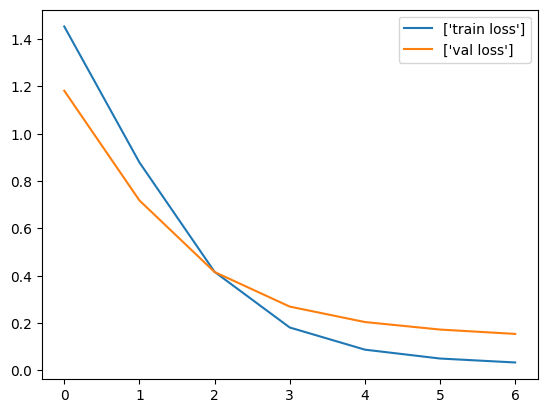

In [ ]:
plt.plot(r.history['loss'],label=['train loss'])
plt.plot(r.history['val_loss'],label=['val loss'])
plt.legend()

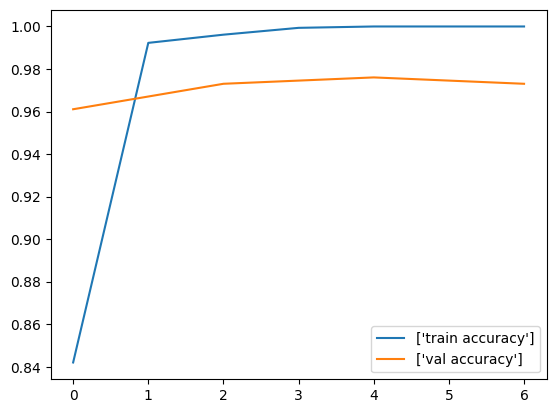

In [ ]:
plt.plot(r.history['accuracy'],label=['train accuracy'])
plt.plot(r.history['val_accuracy'],label=['val accuracy'])
plt.legend()

<Axes: >

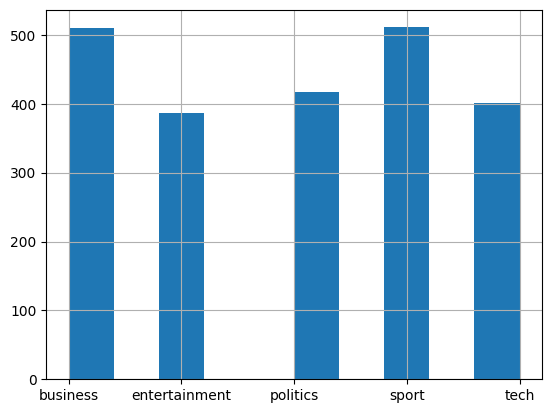

In [ ]:
df['labels'].hist()